In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42)

In [2]:
data = pd.read_csv("train-bank-campaign-data.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_var
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,65790
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55643
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,66189
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,70807
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,42625


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_var'],
      dtype='object')

In [5]:
data.shape

(37084, 22)

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
id_var              int64
dtype: object

In [7]:
stats = data.describe().T
stats['unique'] = [len(data[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats['unknown'] = [(data[column] == "unknown").sum() for column in stats.index]
stats

,count,mean,std,min,25%,50%,75%,max,unique,null,unknown
age,37084.0,40.042714,10.432965,17.000,32.000,38.000,47.000,98.000,77,0,0
duration,37084.0,258.237946,258.730909,0.000,102.000,180.000,319.250,4918.000,1509,0,0
campaign,37084.0,2.569545,2.770611,1.000,1.000,2.000,3.000,56.000,42,0,0
pdays,37084.0,962.530849,186.773063,0.000,999.000,999.000,999.000,999.000,27,0,0
previous,37084.0,0.172986,0.495681,0.000,0.000,0.000,0.000,7.000,8,0,0
emp.var.rate,37084.0,0.082669,1.568997,-3.400,-1.800,1.100,1.400,1.400,10,0,0
cons.price.idx,37084.0,93.576076,0.578493,92.201,93.075,93.749,93.994,94.767,26,0,0
cons.conf.idx,37084.0,-40.505183,4.622045,-50.800,-42.700,-41.800,-36.400,-26.900,26,0,0
euribor3m,37084.0,3.621668,1.733972,0.634,1.344,4.857,4.961,5.045,314,0,0
nr.employed,37084.0,5167.058664,72.196605,4963.600,5099.100,5191.000,5228.100,5228.100,11,0,0


In [8]:
cat_stats = data.describe(include=['object']).T
cat_stats['null'] = [data[column].isnull().sum() for column in cat_stats.index]
cat_stats['unknown'] = [(data[column] == "unknown").sum() for column in cat_stats.index]
cat_stats

,count,unique,top,freq,null,unknown
job,37084,12,admin.,9420,0,306
marital,37084,4,married,22479,0,72
education,37084,8,university.degree,10971,0,1549
default,37084,3,no,29382,0,7700
housing,37084,3,yes,19433,0,882
loan,37084,3,no,30561,0,882
contact,37084,2,cellular,23522,0,0
month,37084,10,may,12420,0,0
day_of_week,37084,5,thu,7778,0,0
poutcome,37084,3,nonexistent,32023,0,0


What does all this information tell us?

1) There is not null values

2) We can see which columns don't contain useful information for our predictions:
* The id_var column contains a unique identifier for each row and will not be useful for prediction
* The duration column is the last contact duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3) The column y is categorical, so we have to transform it to numerical.

4) We should analyze the correlation of numerical features and delete the columns highly correlated.

5) Transform categorical features to numerical using one-hot encode (get_dummmies)

In [9]:
data.drop(columns = ['id_var', 'duration'], inplace = True)

In [10]:
# Label Encoding
data['target'] = np.where(data['y'] == "yes", 1, 0)
data.drop(columns = 'y', inplace = True)

In [11]:
features = data[[col for col in data if col not in ['target']]].reset_index(drop = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [12]:
target = data[['target']]

In [13]:
corr_matrix = features.corr().abs()
corr_matrix

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.002777,0.035689,0.022897,0.000099,0.002773,0.129262,0.010845,0.018226
campaign,0.002777,1.000000,0.052624,0.078300,0.150390,0.126598,0.012388,0.134640,0.143609
pdays,0.035689,0.052624,1.000000,0.586728,0.271053,0.078072,0.089587,0.297038,0.372449
previous,0.022897,0.078300,0.586728,1.000000,0.418880,0.200008,0.052069,0.453220,0.500861
emp.var.rate,0.000099,0.150390,0.271053,0.418880,1.000000,0.774727,0.199778,0.972243,0.906857
cons.price.idx,0.002773,0.126598,0.078072,0.200008,0.774727,1.000000,0.062526,0.687433,0.521010
cons.conf.idx,0.129262,0.012388,0.089587,0.052069,0.199778,0.062526,1.000000,0.280493,0.102931
euribor3m,0.010845,0.134640,0.297038,0.453220,0.972243,0.687433,0.280493,1.000000,0.945145
nr.employed,0.018226,0.143609,0.372449,0.500861,0.906857,0.521010,0.102931,0.945145,1.000000


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'campaign'),
 Text(2.5, 0, 'pdays'),
 Text(3.5, 0, 'previous'),
 Text(4.5, 0, 'emp.var.rate'),
 Text(5.5, 0, 'cons.price.idx'),
 Text(6.5, 0, 'cons.conf.idx'),
 Text(7.5, 0, 'euribor3m'),
 Text(8.5, 0, 'nr.employed')]

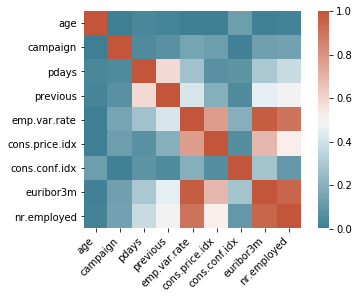

In [31]:
ax = sns.heatmap(
    corr_matrix, #data

    cmap = sns.diverging_palette(
        220, # Anchor hue (negative)
        20, # Anchor hue (positive)
        n = 360 #Number of colors in the palette (optional)
    ),
    square = True,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [14]:
tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
upper = corr_matrix.where(tri)
# Find index of feature columns with correlation greater than 90%
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
to_drop

['euribor3m', 'nr.employed']

In [15]:
# Drop highly colinear features
features.drop(features[to_drop], axis = 1, inplace = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4


In [16]:
cat_data = data.select_dtypes(include=['object']).copy()

In [17]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [18]:
cat_data['job'].unique()

array(['services', 'admin.', 'blue-collar', 'technician', 'housemaid',
       'retired', 'management', 'unknown', 'entrepreneur', 'unemployed',
       'student', 'self-employed'], dtype=object)

In [19]:
cat_data_dummies = pd.get_dummies(data[cat_data.columns])
cat_data_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
df = features.copy()
df.drop(columns = cat_data.columns, inplace = True)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,1,999,0,1.1,93.994,-36.4
1,45,1,999,0,1.1,93.994,-36.4
2,59,1,999,0,1.1,93.994,-36.4
3,41,1,999,0,1.1,93.994,-36.4
4,24,1,999,0,1.1,93.994,-36.4


In [21]:
features = pd.concat([cat_data_dummies, df], axis=1)
features

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,56,1,999,0,1.1,93.994,-36.4
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,45,1,999,0,1.1,93.994,-36.4
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,59,1,999,0,1.1,93.994,-36.4
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,41,1,999,0,1.1,93.994,-36.4
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,24,1,999,0,1.1,93.994,-36.4
5,0,0,0,0,0,0,0,1,0,0,...,0,1,0,25,1,999,0,1.1,93.994,-36.4
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,41,1,999,0,1.1,93.994,-36.4
7,0,0,0,0,0,0,0,1,0,0,...,0,1,0,25,1,999,0,1.1,93.994,-36.4
8,0,1,0,0,0,0,0,0,0,0,...,0,1,0,29,1,999,0,1.1,93.994,-36.4
9,0,0,0,1,0,0,0,0,0,0,...,0,1,0,57,1,999,0,1.1,93.994,-36.4


In [23]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

train_X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
26924,0,1,0,0,0,0,0,0,0,0,...,1,0,0,43,2,999,1,-1.8,93.075,-47.1
36434,1,0,0,0,0,0,0,0,0,0,...,0,0,1,55,2,6,3,-1.7,94.027,-38.3
9444,0,0,0,0,1,0,0,0,0,0,...,0,1,0,49,18,999,0,1.4,94.465,-41.8
25809,0,0,0,0,0,0,0,1,0,0,...,0,1,0,52,2,999,0,-1.8,93.075,-47.1
9641,0,0,0,0,0,1,0,0,0,0,...,0,1,0,55,4,999,0,1.4,94.465,-41.8


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


classifiers = {'Logistic Regression': LogisticRegression(solver = 'lbfgs'),
              'Gaussian NB': GaussianNB(),
              'Bernoulli NB': BernoulliNB(),
              'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'Linear SVC': LinearSVC(),
              'Neural Network':  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)}
              
def compare_models(x, y, model_dict, folds=3):
    results = []
    for name, model in model_dict.items():
        scores = cross_val_score(model, x, y, cv=folds)
        stats = [name, scores.mean(), min(scores), max(scores), scores.std(), pd.Series(scores).mad(), scores]
        results.append(stats)
    df = pd.DataFrame(results, columns = ['Model', 'Mean', 'Min', 'Max','Std', 'Mad', 'Score'])
    df = df.sort_values('Mean', ascending = False)
    return df

In [28]:
compare_models(features, target, classifiers, folds=5)

,Model,Mean,Min,Max,Std,Mad,Score
6,Neural Network,0.886528,0.886477,0.886597,0.000056,0.000055,"[0.8864923159881369, 0.8864770122691115, 0.886..."
3,Random Forest,0.853788,0.726942,0.886492,0.063441,0.050738,"[0.8864923159881369, 0.8864770122691115, 0.886..."
0,Logistic Regression,0.803491,0.584277,0.894432,0.120157,0.103850,"[0.8864923159881369, 0.8891735202912229, 0.894..."
5,Linear SVC,0.793890,0.546791,0.900499,0.135329,0.116719,"[0.8864923159881369, 0.8864770122691115, 0.900..."
2,Bernoulli NB,0.702251,0.337513,0.903600,0.228525,0.215415,"[0.8864923159881369, 0.9035998382095187, 0.855..."
4,KNeighborsClassifier,0.619038,0.423544,0.886492,0.185966,0.178094,"[0.8864923159881369, 0.5078872859646757, 0.796..."
1,Gaussian NB,0.605662,0.271575,0.882853,0.241494,0.217917,"[0.88285252089512, 0.4319805851422408, 0.87326..."
